<h1> Importations

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
mpl.style.use('seaborn')
from matplotlib import pyplot as plt

In [2]:
## Read csvs

train_df_init = gpd.read_file('train.geojson').set_index("index")
test_df_init = gpd.read_file('test.geojson').set_index("index")

In [3]:
## Copying them
train_df = train_df_init.copy(deep=True)
test_df = test_df_init.copy(deep=True)

<h1> First Analysis of the Data

In [4]:
train_df.head(5)

,change_type,change_status_date1,change_status_date2,change_status_date3,change_status_date4,change_status_date5,date1,date2,date3,date4,date5,urban_types,geography_types,geometry
index,,,,,,,,,,,,,,
0,Commercial,Land Cleared,Construction Midway,Construction Done,Construction Done,Construction Done,29-05-2014,13-09-2015,25-02-2017,10-10-2018,19-05-2020,Industrial,"River,Sparse Forest,Grass Land","POLYGON ((116.97563 38.89002, 116.97590 38.890..."
1,Commercial,Greenland,Greenland,Construction Done,Construction Done,Construction Done,29-05-2014,13-09-2015,25-02-2017,10-10-2018,19-05-2020,Sparse Urban,"Sparse Forest,Grass Land","POLYGON ((116.97500 38.88969, 116.97524 38.889..."
2,Commercial,Land Cleared,Land Cleared,Construction Done,Construction Done,Construction Done,29-05-2014,13-09-2015,25-02-2017,10-10-2018,19-05-2020,Sparse Urban,"Sparse Forest,Grass Land","POLYGON ((116.97519 38.88847, 116.97568 38.888..."
3,Commercial,Land Cleared,Land Cleared,Construction Midway,Construction Midway,Construction Done,29-05-2014,13-09-2015,25-02-2017,10-10-2018,19-05-2020,Industrial,"River,Sparse Forest,Grass Land","POLYGON ((116.97630 38.89017, 116.97730 38.890..."
4,Commercial,Land Cleared,Land Cleared,Construction Started,Construction Midway,Construction Done,29-05-2014,13-09-2015,25-02-2017,10-10-2018,19-05-2020,Industrial,"River,Sparse Forest,Grass Land","POLYGON ((116.97751 38.89037, 116.97854 38.890..."


In [5]:
train_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 310006 entries, 0 to 310005
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   change_type          310006 non-null  object  
 1   change_status_date1  310006 non-null  object  
 2   change_status_date2  310006 non-null  object  
 3   change_status_date3  310006 non-null  object  
 4   change_status_date4  310006 non-null  object  
 5   change_status_date5  310006 non-null  object  
 6   date1                310006 non-null  object  
 7   date2                310006 non-null  object  
 8   date3                310006 non-null  object  
 9   date4                310006 non-null  object  
 10  date5                310006 non-null  object  
 11  urban_types          310006 non-null  object  
 12  geography_types      310006 non-null  object  
 13  geometry             310006 non-null  geometry
dtypes: geometry(1), object(13)
memory usage: 35.

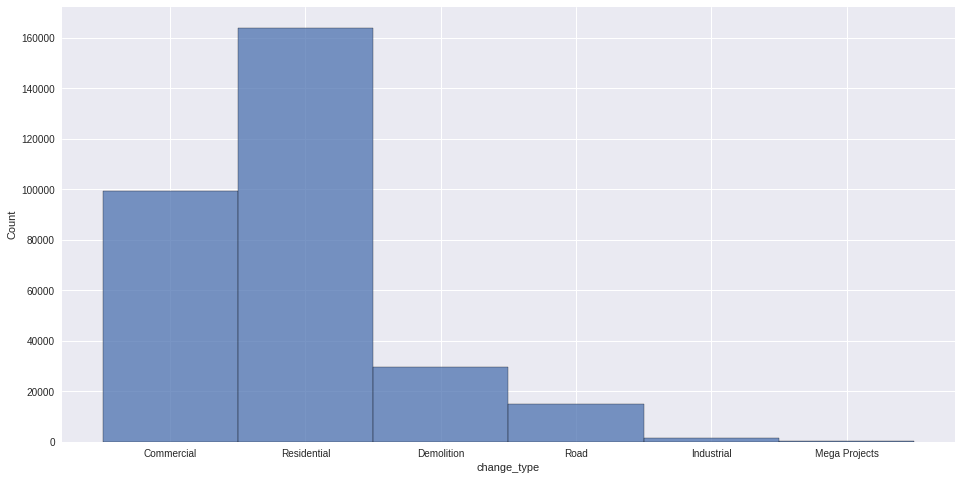

In [6]:
# Let's see if the target categories are equilibrated.

feature = "change_type"
values = np.unique(train_df[feature])

plt.figure(figsize = (16,8))
sns.histplot(data = train_df, x = feature)
plt.show()

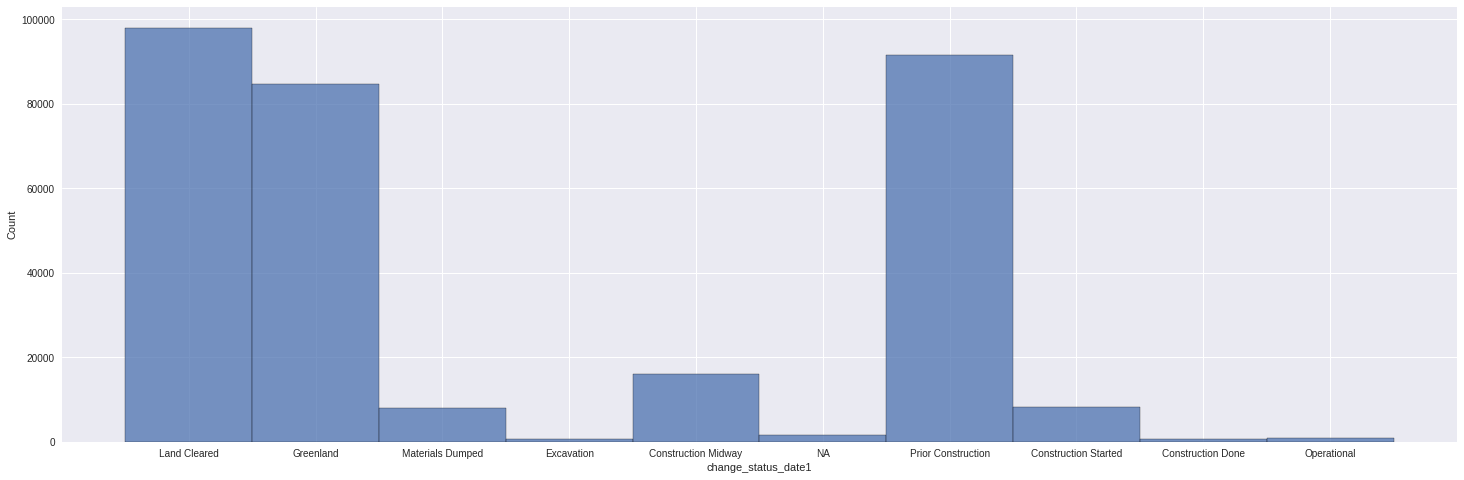

In [7]:
feature = "change_status_date1"
values = np.unique(train_df[feature])

plt.figure(figsize = (25,8))
sns.histplot(data = train_df, x = feature)
plt.show()

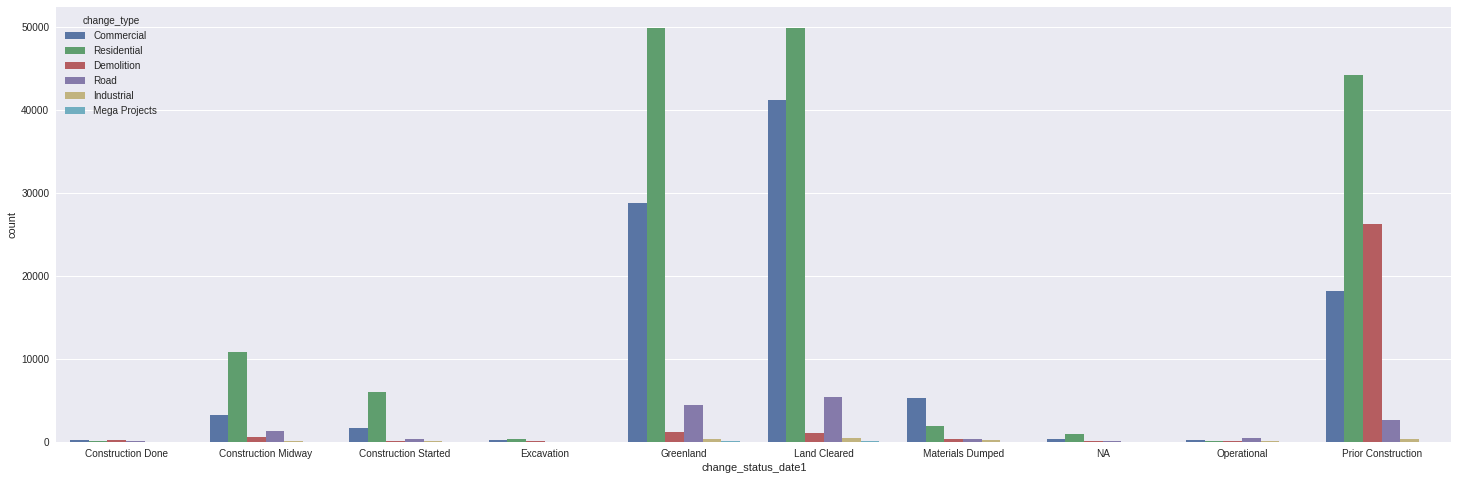

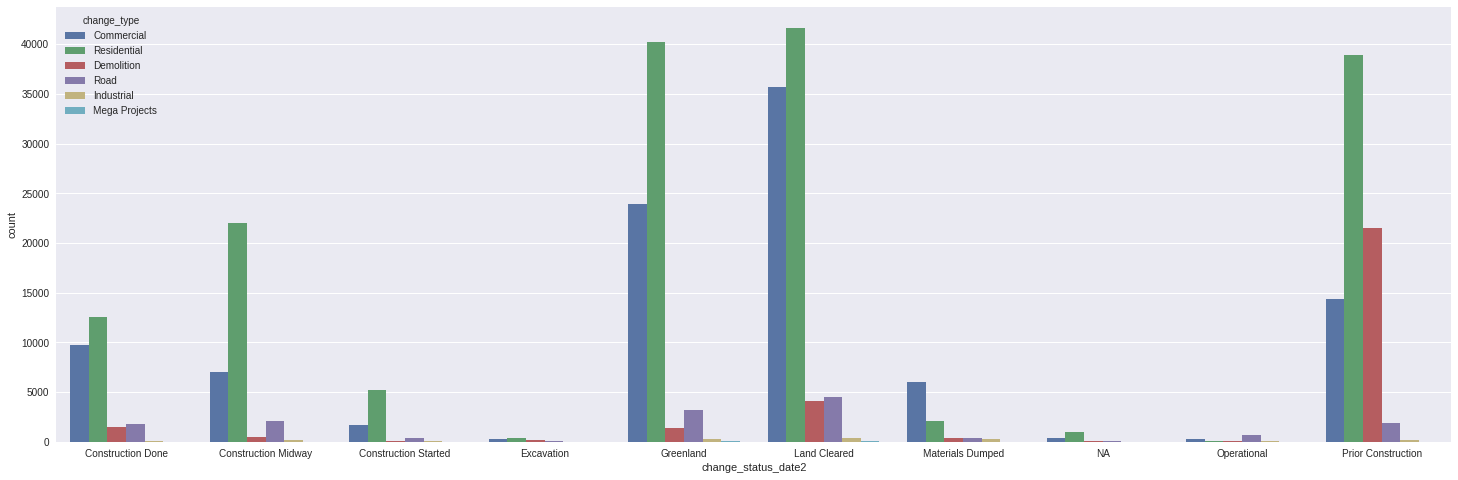

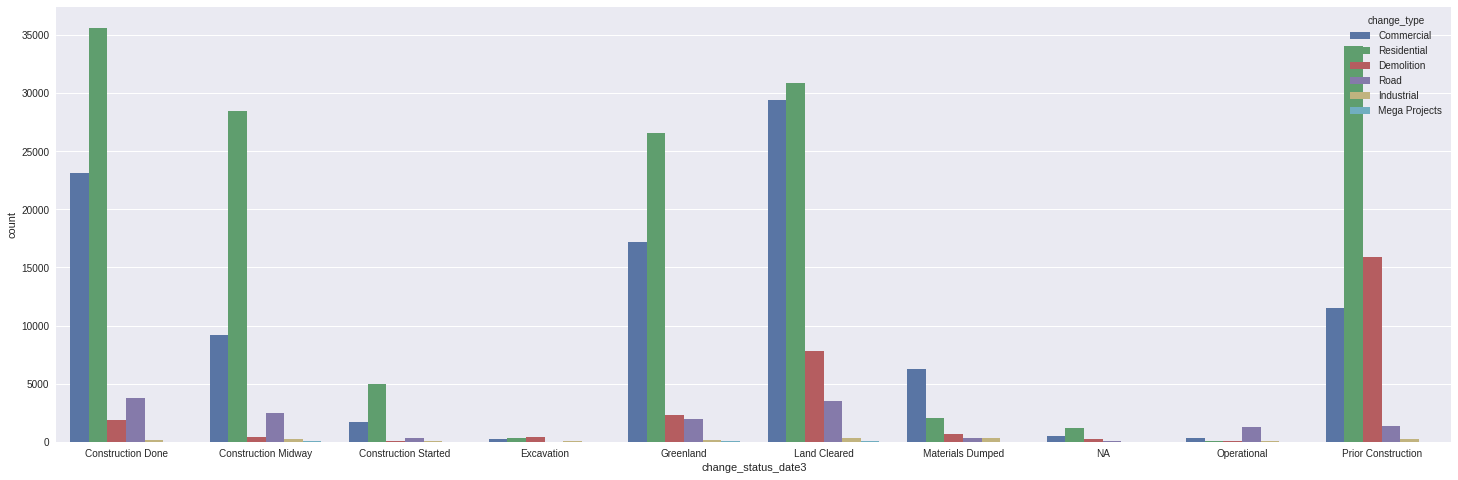

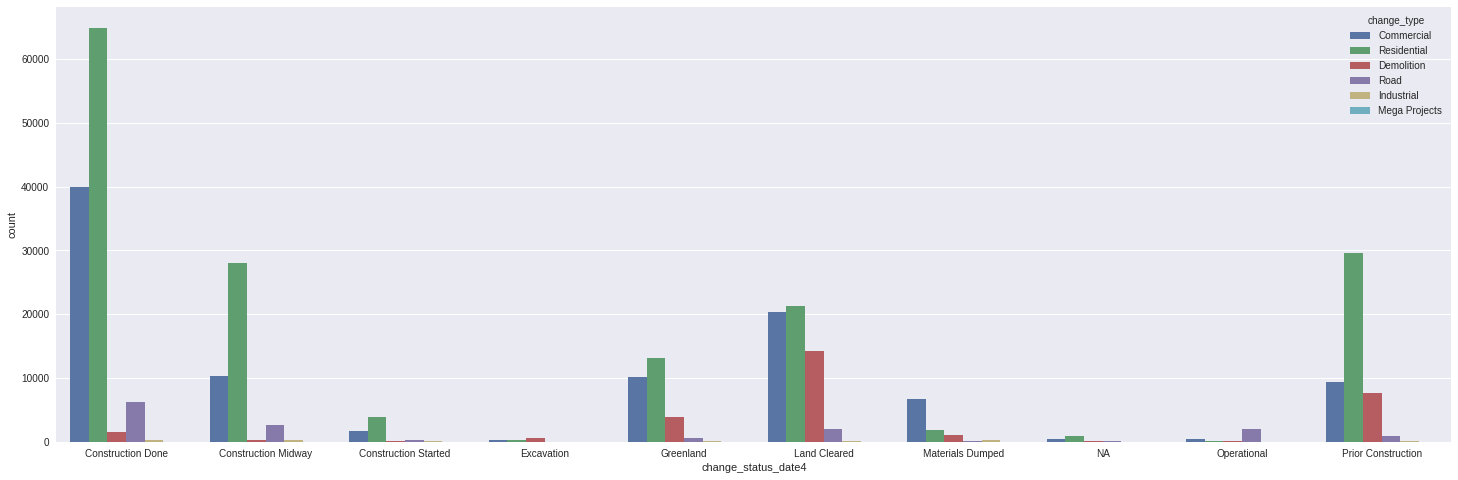

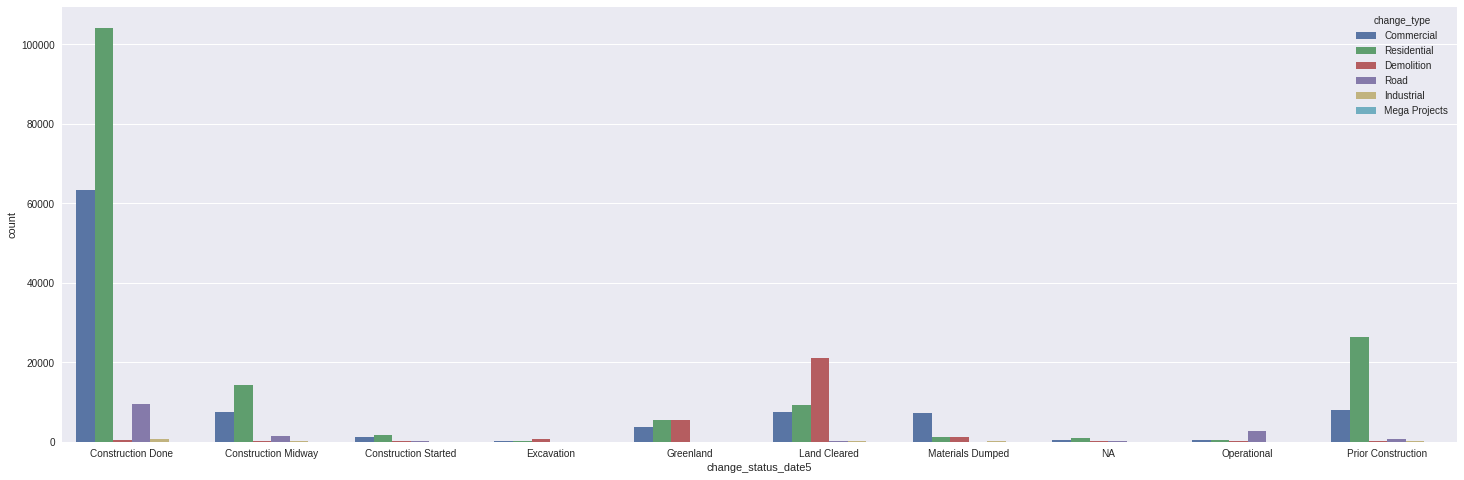

In [8]:
changes = ["change_status_date1", "change_status_date2", "change_status_date3", "change_status_date4", "change_status_date5"]
values = np.unique(train_df[changes])

for change in changes :
    plt.figure(figsize = (25,8))
    sns.countplot(data = train_df, x = change, hue= "change_type", order = values)
    plt.show()

Note :
- If it is "Demolition", We can see it is almost always "Land Cleared", "Greenland" or "Materials Dumped" in the end.


<h3>

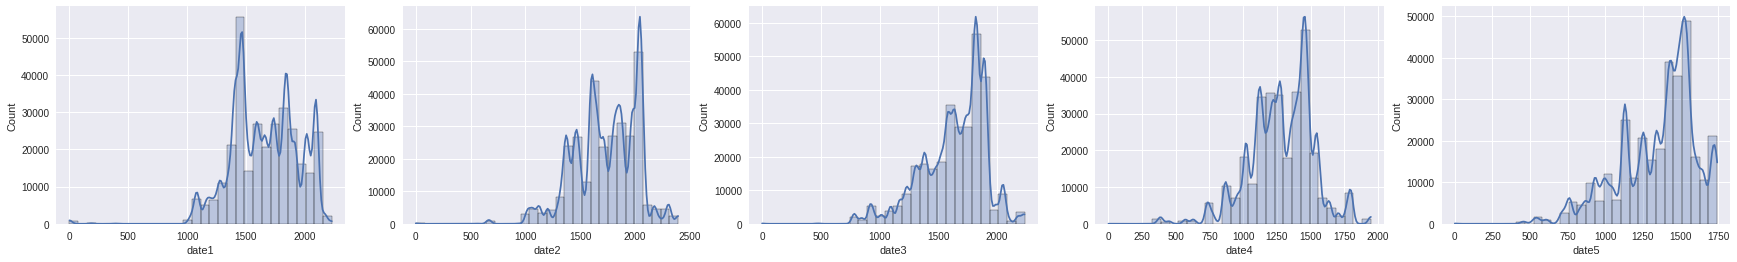

In [9]:
dates = ["date1", "date2", "date3", "date4", "date5"]

fig, axes = plt.subplots(1, 5, figsize = (30,4))

for i, date in enumerate(dates) :
    min_date = pd.to_datetime(train_df[date]).min()

    sns.histplot((pd.to_datetime(train_df[date]) - min_date).apply(lambda x: x.days), ax = axes[i], kde = True, bins = 30, alpha = 0.3)

plt.show()


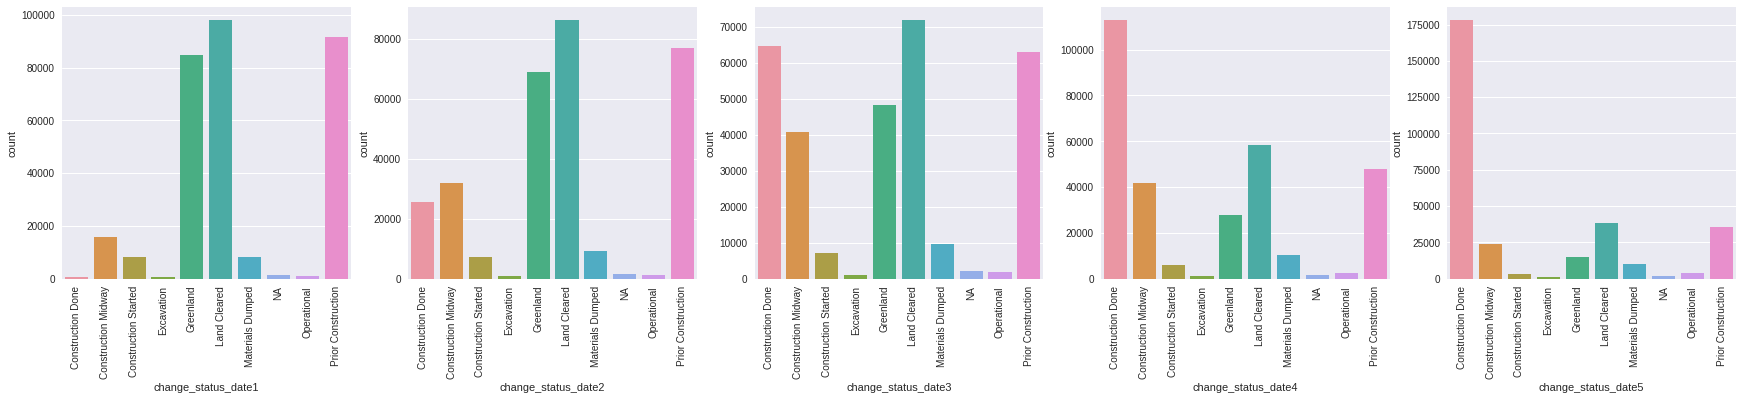

In [10]:
changes = ["change_status_date1", "change_status_date2", "change_status_date3", "change_status_date4", "change_status_date5"]
values = np.unique(train_df[changes])

fig, axes = plt.subplots(1, 5, figsize = (30,5))

for i, change in enumerate(changes) :
    
    sns.countplot(x = train_df[change], ax = axes[i], order = values)
    axes[i].tick_params(axis='x', rotation=90)

plt.show()

<AxesSubplot:>

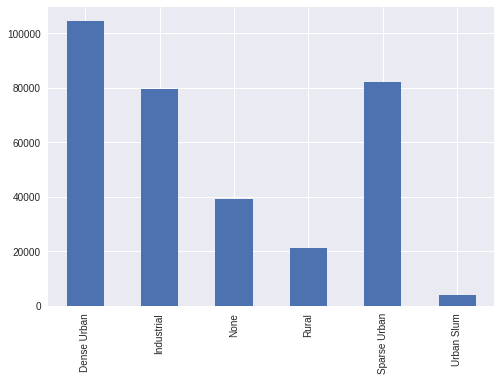

In [11]:
feature = "urban_types"
values = np.unique(train_df[feature])
values = list(set(",".join(values).split(",")))

train_df[feature].str.get_dummies(sep = ',').sum().plot.bar()


<AxesSubplot:>

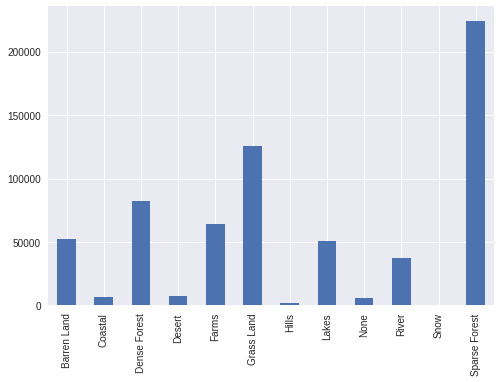

In [12]:
feature = "geography_types"
values = np.unique(train_df[feature])
values = list(set(",".join(values).split(",")))

train_df[feature].str.get_dummies(sep = ',').sum().plot.bar()

<h1> Preprocessing

In [13]:
preprocess_train_df = train_df.copy(deep = True)
preprocess_test_df = test_df.copy(deep = True)

<h2> Using the geometry

In [14]:
## Handling area value (We can choose something else)
preprocess_train_df['area'] = train_df['geometry'].map(lambda a: a.area)
preprocess_train_df['perimeter'] = train_df['geometry'].map(lambda a: a.length)

preprocess_test_df['area'] = test_df['geometry'].map(lambda a: a.area)
preprocess_test_df['perimeter'] = test_df['geometry'].map(lambda a: a.length)

In [15]:
preprocess_train_df = preprocess_train_df.drop(columns=['geometry'])
preprocess_test_df = preprocess_test_df.drop(columns=['geometry'])

<AxesSubplot:xlabel='perimeter', ylabel='Density'>

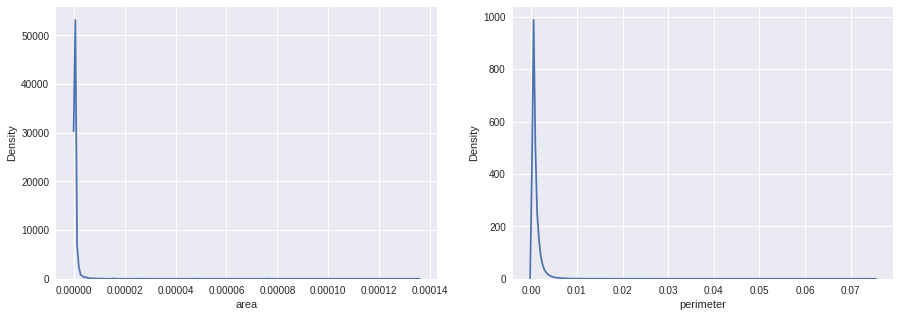

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
sns.kdeplot(preprocess_train_df['area'], ax = ax[0])
sns.kdeplot(preprocess_train_df['perimeter'], ax = ax[1])

In [17]:
# Handling Values 0 before log

if preprocess_train_df['area'].min() <= 0:
    preprocess_train_df['area'] = preprocess_train_df['area'].apply(lambda x :  preprocess_train_df['area'].max() if x<= 0 else x).apply(lambda x : preprocess_train_df['area'].min() if x == np.inf else x)
if preprocess_train_df['perimeter'].min() <= 0:
    preprocess_train_df['perimeter'] = preprocess_train_df['perimeter'].apply(lambda x :  preprocess_train_df['perimeter'].max() if x<= 0 else x).apply(lambda x : preprocess_train_df['perimeter'].min() if x == np.inf else x)

if preprocess_test_df['area'].min() <= 0:
    preprocess_test_df['area'] = preprocess_test_df['area'].apply(lambda x : preprocess_test_df['area'].max() if x<= 0 else x).apply(lambda x : preprocess_test_df['area'].min() if x == np.inf else x)
if preprocess_test_df['perimeter'].min() <= 0:
    preprocess_test_df['perimeter'] = preprocess_test_df['perimeter'].apply(lambda x : preprocess_test_df['perimeter'].max() if x<= 0 else x).apply(lambda x : preprocess_test_df['perimeter'].min() if x == np.inf else x)
    

In [18]:
preprocess_train_df['area'] = np.log(preprocess_train_df['area'])
preprocess_train_df['perimeter'] = np.log(preprocess_train_df['perimeter'])

preprocess_test_df['area'] = np.log(preprocess_test_df['area'])
preprocess_test_df['perimeter'] = np.log(preprocess_test_df['perimeter'])

<AxesSubplot:xlabel='perimeter', ylabel='Count'>

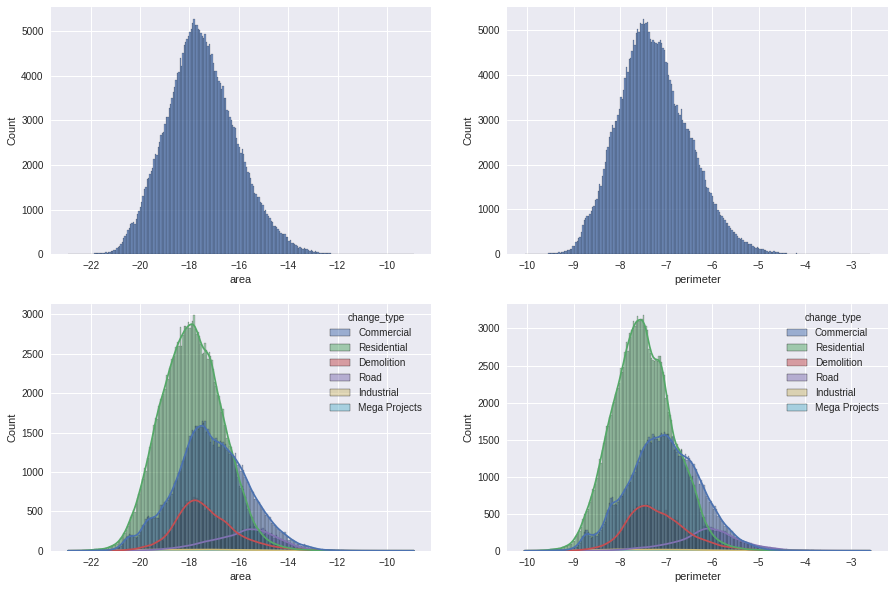

In [19]:
fig, ax = plt.subplots(2, 2, figsize = (15,10))
sns.histplot(data = preprocess_train_df, x = 'area', ax = ax[0][0])
sns.histplot(preprocess_train_df, x = 'perimeter', ax = ax[0,1])

sns.histplot(data = preprocess_train_df, x = 'area', ax = ax[1][0], hue = "change_type", kde = True)
sns.histplot(preprocess_train_df, x = 'perimeter', ax = ax[1,1], hue = "change_type", kde = True )

Remarques :
- "Residential", "Commercial" et "Demolition" have generally a lower area and perimeter than "Road"

<AxesSubplot:xlabel='area', ylabel='perimeter'>

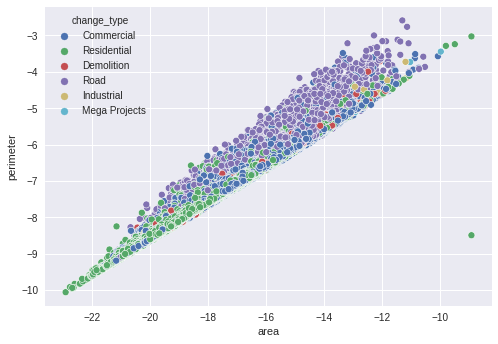

In [20]:
sns.scatterplot(data = preprocess_train_df, x = 'area', y = "perimeter", hue = "change_type")

Those two features seem extremely linked so it may not be helpful to add both

<h2> One Hot encoding Urban types

In [21]:
feature = "urban_types"
class_maping = {label: idx for idx, label in enumerate(np.unique(train_df[feature]))}

# Careful : 15 different classes

train_urban = preprocess_train_df[feature].str.get_dummies(sep = ',')
test_urban = preprocess_test_df[feature].str.get_dummies(sep = ',')

In [22]:
## Drop the old urban_type column and replacing it with the one hot encoding
preprocess_train_df_Urban = pd.concat([preprocess_train_df.drop([feature], axis=1), train_urban], sort=False, axis=1)
preprocess_test_df_Urban = pd.concat([preprocess_test_df.drop([feature], axis=1), test_urban], sort=False, axis=1)

In [23]:
preprocess_train_df = preprocess_train_df_Urban.copy()
preprocess_test_df = preprocess_test_df_Urban.copy()

<h2> One Hot encoding geography

In [24]:
## Creating the one hot-encoding for lists
feature = "geography_types"

geo_train = train_df[feature].str.get_dummies(sep = ',')
geo_test = test_df[feature].str.get_dummies(sep = ',')

In [25]:
## Drop the old geography type column and replacing it with the one hot encoding
preprocess_train_df_Geo = pd.concat([preprocess_train_df.drop([feature], axis=1), geo_train], sort=False, axis=1)
preprocess_test_df_Geo = pd.concat([preprocess_test_df.drop([feature], axis=1), geo_test], sort=False, axis=1)

In [26]:
preprocess_train_df = preprocess_train_df_Geo.copy()
preprocess_test_df = preprocess_test_df_Geo.copy()

<h2> Handling date columns

In [27]:
# For the moment, I chose to put the difference between the date and date 1, in days 

dates = ["date2", "date3", "date4", "date5"]

preprocess_train_df_date = preprocess_train_df.copy()
preprocess_test_df_date = preprocess_test_df.copy()

for date in dates :
    preprocess_train_df_date[date] = (pd.to_datetime(preprocess_train_df[date]) - pd.to_datetime(preprocess_train_df["date1"])).apply(lambda x: x.days)
    preprocess_test_df_date[date] = (pd.to_datetime(preprocess_test_df[date]) - pd.to_datetime(preprocess_test_df["date1"])).apply(lambda x: x.days)

preprocess_train_df_date = preprocess_train_df_date.drop(columns = ["date1"])
preprocess_test_df_date = preprocess_test_df_date.drop(columns = ["date1"])

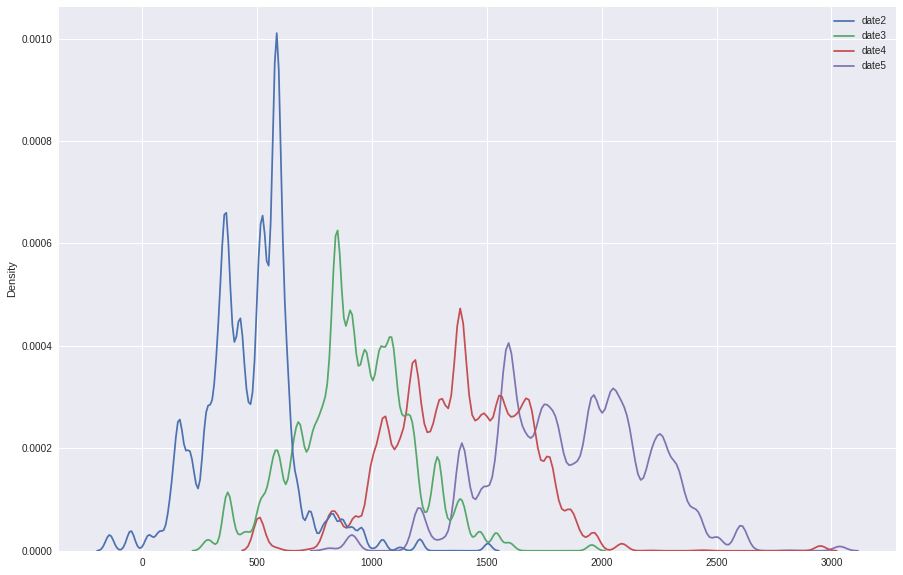

In [28]:
plt.figure(figsize=(15,10))
sns.kdeplot(data = preprocess_train_df_date[dates])
plt.show()

Note : C'est bizarre d'avoir des valeurs négatives... Soit j'ai mal fait ma fonction, soit les données sont pas incroyables.

In [29]:
preprocess_train_df = preprocess_train_df_date.copy()
preprocess_test_df = preprocess_test_df_date.copy()

<h2> Handling Change Values Date

In [30]:
## One-hot-encoding for each columns
change_status_columns = ["change_status_date1", "change_status_date2", "change_status_date3", "change_status_date4", "change_status_date5"]

preprocess_train_df_change = pd.get_dummies(preprocess_train_df, columns = change_status_columns)
preprocess_test_df_change = pd.get_dummies(preprocess_test_df, columns = change_status_columns)

In [31]:
## And we are going to keep in mind every existing change

for i in range(len(change_status_columns)-1):
    new_feature = "change_" + str(i+1) + "_to_" + str(i+2)
    change_date_first = "change_status_date" + str(i+1)
    change_date_second = "change_status_date" + str(i+2)
    preprocess_train_df_change[new_feature] = preprocess_train_df[change_date_first] + " - " + preprocess_train_df[change_date_second]
    preprocess_test_df_change[new_feature] = preprocess_test_df[change_date_first] + " - " + preprocess_test_df[change_date_second]

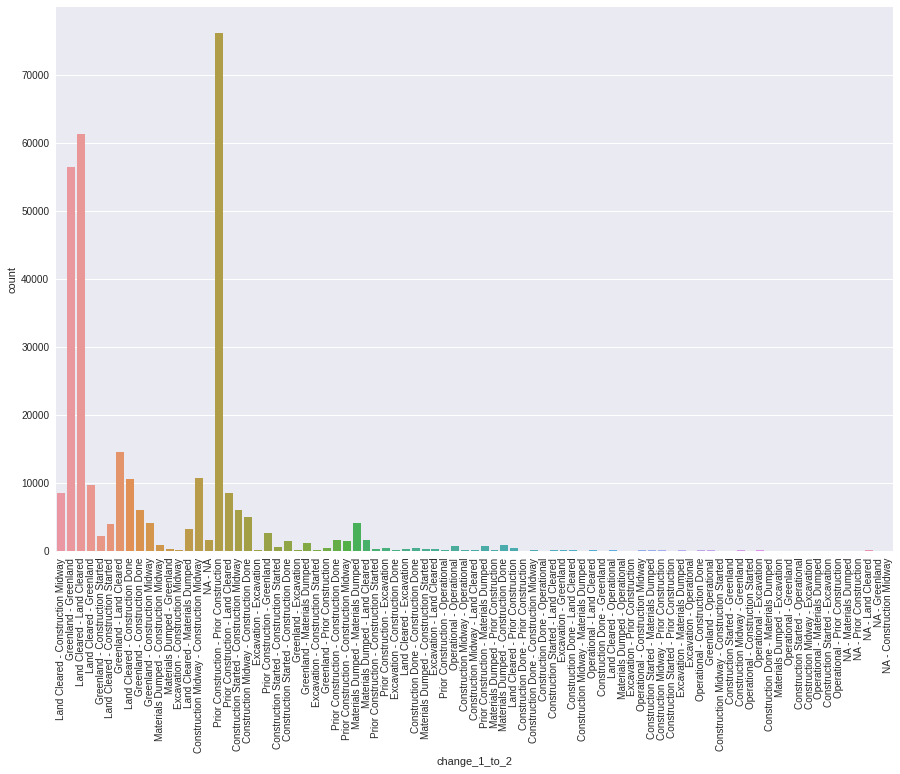

In [32]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(x = preprocess_train_df_change["change_1_to_2"], ax = ax)
ax.tick_params(axis='x', rotation=90)

In [33]:
transitions = ["change_" + str(i+1) + "_to_" + str(i+2) for i in range(len(change_status_columns)-1)]
preprocess_train_df_change = pd.get_dummies(preprocess_train_df_change, columns = transitions)
preprocess_test_df_change = pd.get_dummies(preprocess_test_df_change, columns = transitions)

In [34]:
preprocess_train_df = preprocess_train_df_change.copy()
preprocess_test_df = preprocess_test_df_change.copy()

<h2> Fill the None values 

In [35]:
preprocess_train_df.columns.to_list()

['change_type',
 'date2',
 'date3',
 'date4',
 'date5',
 'area',
 'perimeter',
 'Dense Urban',
 'Industrial',
 'None',
 'Rural',
 'Sparse Urban',
 'Urban Slum',
 'Barren Land',
 'Coastal',
 'Dense Forest',
 'Desert',
 'Farms',
 'Grass Land',
 'Hills',
 'Lakes',
 'None',
 'River',
 'Snow',
 'Sparse Forest',
 'change_status_date1_Construction Done',
 'change_status_date1_Construction Midway',
 'change_status_date1_Construction Started',
 'change_status_date1_Excavation',
 'change_status_date1_Greenland',
 'change_status_date1_Land Cleared',
 'change_status_date1_Materials Dumped',
 'change_status_date1_NA',
 'change_status_date1_Operational',
 'change_status_date1_Prior Construction',
 'change_status_date2_Construction Done',
 'change_status_date2_Construction Midway',
 'change_status_date2_Construction Started',
 'change_status_date2_Excavation',
 'change_status_date2_Greenland',
 'change_status_date2_Land Cleared',
 'change_status_date2_Materials Dumped',
 'change_status_date2_NA',
 'c

<AxesSubplot:>

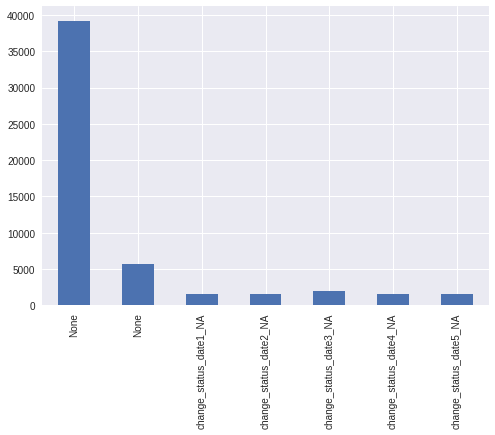

In [36]:
# First approach is just to drop every columns with "None" or "NA" inside the column name

columns_None_NA = ["None", "change_status_date1_NA", "change_status_date2_NA", "change_status_date3_NA", "change_status_date4_NA", "change_status_date5_NA"]

preprocess_train_df[columns_None_NA].sum().plot.bar()

- On va drop toutes ses colonnes None
- Par contre on garde les transitions avec des NA pour le moment

In [37]:
preprocess_train_df_dropNA = preprocess_train_df.drop(columns = columns_None_NA)
preprocess_test_df_dropNA = preprocess_test_df.drop(columns = columns_None_NA)

In [38]:
preprocess_train_df = preprocess_train_df_dropNA.copy()
preprocess_test_df = preprocess_test_df_dropNA.copy()

<h2> Drop columns not in common

In [39]:
drop_train = [e for e in preprocess_train_df.columns if e not in preprocess_test_df]
drop_train.remove("change_type")
drop_test = [e for e in preprocess_test_df.columns if e not in preprocess_train_df]

In [40]:
preprocess_train_df = preprocess_train_df.drop(columns = drop_train)
preprocess_test_df = preprocess_test_df.drop(columns = drop_test)

In [41]:
preprocess_test_df.columns

Index(['date2', 'date3', 'date4', 'date5', 'area', 'perimeter', 'Dense Urban',
       'Industrial', 'Rural', 'Sparse Urban',
       ...
       'change_4_to_5_Operational - Prior Construction',
       'change_4_to_5_Prior Construction - Construction Done',
       'change_4_to_5_Prior Construction - Construction Midway',
       'change_4_to_5_Prior Construction - Construction Started',
       'change_4_to_5_Prior Construction - Excavation',
       'change_4_to_5_Prior Construction - Greenland',
       'change_4_to_5_Prior Construction - Land Cleared',
       'change_4_to_5_Prior Construction - Materials Dumped',
       'change_4_to_5_Prior Construction - Operational',
       'change_4_to_5_Prior Construction - Prior Construction'],
      dtype='object', length=388)

In [42]:
preprocess_train_df.columns

Index(['change_type', 'date2', 'date3', 'date4', 'date5', 'area', 'perimeter',
       'Dense Urban', 'Industrial', 'Rural',
       ...
       'change_4_to_5_Operational - Prior Construction',
       'change_4_to_5_Prior Construction - Construction Done',
       'change_4_to_5_Prior Construction - Construction Midway',
       'change_4_to_5_Prior Construction - Construction Started',
       'change_4_to_5_Prior Construction - Excavation',
       'change_4_to_5_Prior Construction - Greenland',
       'change_4_to_5_Prior Construction - Land Cleared',
       'change_4_to_5_Prior Construction - Materials Dumped',
       'change_4_to_5_Prior Construction - Operational',
       'change_4_to_5_Prior Construction - Prior Construction'],
      dtype='object', length=389)

In [43]:
# And while we are at it, let's ordonate the columns

preprocess_test_df = preprocess_test_df.reindex(columns = list(preprocess_train_df.columns))

In [44]:
preprocess_test_df.columns

Index(['change_type', 'date2', 'date3', 'date4', 'date5', 'area', 'perimeter',
       'Dense Urban', 'Industrial', 'Rural',
       ...
       'change_4_to_5_Operational - Prior Construction',
       'change_4_to_5_Prior Construction - Construction Done',
       'change_4_to_5_Prior Construction - Construction Midway',
       'change_4_to_5_Prior Construction - Construction Started',
       'change_4_to_5_Prior Construction - Excavation',
       'change_4_to_5_Prior Construction - Greenland',
       'change_4_to_5_Prior Construction - Land Cleared',
       'change_4_to_5_Prior Construction - Materials Dumped',
       'change_4_to_5_Prior Construction - Operational',
       'change_4_to_5_Prior Construction - Prior Construction'],
      dtype='object', length=389)

In [45]:
preprocess_test_df = preprocess_test_df.drop(columns = ["change_type"])

<h1> Save the dataframe as a csv and json on the hard disk

In [46]:
preprocess_train_df.to_csv("preprocessed_train.csv")
preprocess_test_df.to_csv("preprocessed_test.csv")

<h1> Let's continue the preprocessing

<h2> Preprocess 2

In [70]:
# We will add some features from POLYGON

new_feature = "length"

preprocess_train_df_2 = preprocess_train_df.copy()
preprocess_test_df_2 = preprocess_test_df.copy()

preprocess_train_df_2[new_feature] = train_df["geometry"].map(lambda a: a.length)
preprocess_test_df_2[new_feature] = test_df["geometry"].map(lambda a: a.length)

In [71]:
new_features = ["minx", "miny", "maxx", "maxy"]

bounds_train = train_df["geometry"].map(lambda a : a.bounds)
bounds_test  = test_df["geometry"].map(lambda a : a.bounds)


for i in range(4):
    preprocess_train_df_2[new_features[i]] = bounds_train.apply(lambda x: x[i])
    preprocess_test_df_2[new_features[i]] = bounds_test.apply(lambda x: x[i])

In [72]:
# Then we are going to link every change to its date + every state
# It will make really a LOT of features but whatever ...

for column in preprocess_test_df_2.columns:
    for i in range(2,6):
        if "_date" + str(i) in column:
            preprocess_train_df_2[column+"_multiplied"] = preprocess_train_df[column]*preprocess_train_df["date"+str(i)]
            preprocess_test_df_2[column+"_multiplied"] = preprocess_test_df[column]*preprocess_test_df["date"+str(i)]

In [73]:
for column in preprocess_test_df_2.columns:
    for i in range(1,5):
        if "change_"+str(i)+"_to_" + str(i+1) in column:
            preprocess_train_df_2[column+"_multiplied"] = preprocess_train_df[column]*preprocess_train_df["date"+str(i+1)]
            preprocess_test_df_2[column+"_multiplied"] = preprocess_test_df[column]*preprocess_test_df["date"+str(i+1)]

/home/epideixx/.local/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)


In [74]:
# Finally we save it in a new csv

preprocess_train_df_2.to_csv("preprocessed_train_2.csv")
preprocess_test_df_2.to_csv("preprocessed_test_2.csv")

<h2> Preprocess 3

In [9]:
preprocess_train_df_3 = pd.read_csv("preprocessed_train_2.csv", index_col="index")
preprocess_test_df_3 = pd.read_csv("preprocessed_test_2.csv", index_col="index")

In [3]:
preprocess_Paul_train = pd.read_csv("cat_xtrain.csv")
preprocess_Paul_test = pd.read_csv("cat_xtest.csv")

In [19]:
preprocess_Paul_train

,Unnamed: 0,change1,change2,change3,change4,change5,urban_types,geography_types,day1,month1,...,geography_type_Grass Land,geography_type_Farms,geography_type_Lakes,geography_type_Barren Land,geography_type_Coastal,geography_type_Dense Forest,geography_type_None,geography_type_Hills,geography_type_Desert,geography_type_Snow
0,0,5,1,0,0,0,3,146,29,5,...,1,0,0,0,0,0,0,0,0,0
1,1,4,4,0,0,0,7,170,29,5,...,1,0,0,0,0,0,0,0,0,0
2,2,5,5,0,0,0,7,170,29,5,...,1,0,0,0,0,0,0,0,0,0
3,3,5,5,1,1,0,3,146,29,5,...,1,0,0,0,0,0,0,0,0,0
4,4,5,5,2,1,0,3,146,29,5,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310000,310000,8,8,8,5,0,3,45,18,11,...,1,0,0,0,1,1,0,0,0,0
310001,310001,5,5,5,5,0,3,156,18,11,...,0,0,0,0,0,1,0,0,0,0
310002,310002,6,5,5,5,0,3,156,18,11,...,0,0,0,0,0,1,0,0,0,0
310003,310003,5,5,5,4,4,3,146,18,11,...,1,0,0,0,0,0,0,0,0,0


In [4]:
interesting_features = ['p_centerx',
 'p_centery',
 'perimetre',
 'logPerimetre',
 'aire',
 'logAire',
 'airePerimetreRatio',
 'logAirePerimetreRatio',
 'airePerimetre2Ratio',
 'squareness',
 'logSquareness',
 'nVert',]

In [5]:
preprocess_Paul_train = preprocess_Paul_train[interesting_features]
preprocess_Paul_test = preprocess_Paul_test[interesting_features]

In [10]:
preprocess_train_df_3 = pd.concat([preprocess_train_df_3, preprocess_Paul_train], axis = 1)
preprocess_test_df_3 = pd.concat([preprocess_test_df_3, preprocess_Paul_test], axis = 1)

In [12]:
preprocess_train_df_3.to_csv("preprocessed_train_3.csv", index_label = "index")
preprocess_test_df_3.to_csv("preprocessed_test_3.csv", index_label = "index")